# Analysis of House Price Market and Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

# Data preprocessing

In [3]:
# Fill Na for specific variables
def FillNa(data):
    data['Alley'] = data['Alley'].fillna('None') 
    data['BsmtQual'] = data['BsmtQual'].fillna('None')
    data['BsmtCond'] = data['BsmtCond'].fillna('None')
    data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
    data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
    data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
    data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)
    data['Fence'] = data['Fence'].fillna('None')
    data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
    data['Functional'] = data['Functional'].fillna('Typ')
    data['GarageType'] = data['GarageType'].fillna('None')
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(int(data['GarageYrBlt'].mean()))
    data['GarageFinish'] = data['GarageFinish'].fillna('None')
    data['GarageCars'] = data['GarageCars'].fillna(0)
    data['GarageArea'] = data['GarageArea'].fillna(0)
    data['GarageQual'] = data['GarageQual'].fillna('None')
    data['GarageCond'] = data['GarageCond'].fillna('None')
    data['KitchenQual'] = data['KitchenQual'].fillna('TA')
    data['KitchenAbvGr'] = data['KitchenAbvGr'].fillna(0)
    data['MasVnrType'] = data['MasVnrType'].fillna('None')
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
    data['Electrical'] = data['Electrical'].fillna('None')
    data['Exterior1st'] = data['Exterior1st'].fillna('None')
    data['Exterior2nd'] = data['Exterior2nd'].fillna('None')
    data['LotFrontage'] = data['LotFrontage'].fillna(0)
    data['PoolQC'] = data['PoolQC'].fillna('None')
    data['MiscFeature'] = data['MiscFeature'].fillna('None')
    data['MSZoning'] = data['MSZoning'].fillna('None')
    data['SaleType'] = data['SaleType'].fillna('Oth')
    data['Utilities'] = data['Utilities'].fillna('NoSeWa')
    return data

In [4]:
train = FillNa(train)
test = FillNa(test)

In [5]:
train['Alley1'] = train['Alley'].map({"None" : 0, "Grvl" : 1, "Pave" : 2})

In [6]:
#train = convert_numerical2category(train)
#test = convert_numerical2category(test)

In [7]:
# Some categorical features' comments related to house sales price
# For example, more positive comments may lead to a higher price and vice versa.
# Function for transforming categorical features to numerical variables
def convert_category2numerical(data):
    data = data.replace({"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"NoSeWa" : 1, "AllPub" : 2},
                       "Neighborhood" : {"MeadowV" : 0, 'IDOTRR' : 0, "BrDale" : 0, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, 
                                       "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2,  "Mitchel" : 2,  
                                       "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3,  
                                       "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 3, "NoRidge" : 4,  
                                       "NridgHt" : 4}}
                     )
    return data

In [8]:
train = convert_category2numerical(train)
test = convert_category2numerical(test)

# Analysis and Data visualization

# House Price Distribution

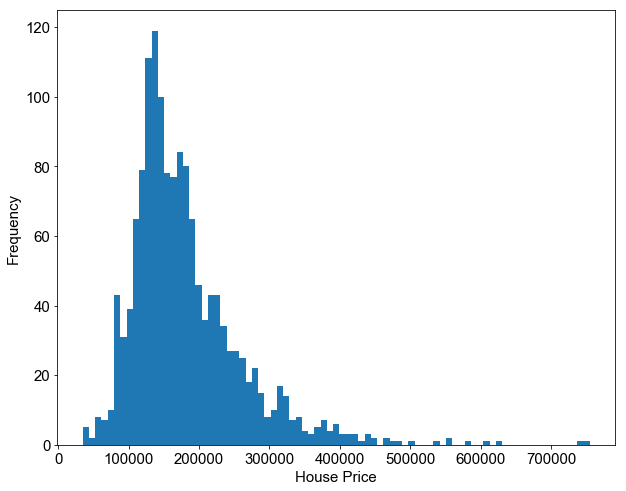

In [9]:
font = {'family' : 'arial',
        'size'   : 15}

matplotlib.rc('font', **font)
ax = train["SalePrice"].hist(bins=int(train.shape[1]),figsize=(10,8))
ax.set_xlabel("House Price")
ax.set_ylabel("Frequency")
ax.grid(b=None)
fig = ax.get_figure()
fig.savefig("D:\HSBC assignment\Figure\HousePriceDist"+".png",bbox_inches='tight')

# Category of houses

In [10]:
# Classify the house type according to house price

In [11]:
# Now we define the class of house price
High = np.percentile(train["SalePrice"],75)
Middle = np.percentile(train["SalePrice"],50)
Low = np.percentile(train["SalePrice"],25)
print(High,Middle,Low)

214000.0 163000.0 129975.0


In [12]:
def houseprice_classification(x):
    if x>= High:
        label = "High"
    elif x<High and x>=Low:
        label = "Middle"
    else:
        label = "Low"
    return label

In [13]:
train["PriceClass"] = train["SalePrice"].apply(houseprice_classification)

# Total amount of sold house price per year

In [14]:
PriceClassYear1 = train.groupby(['YrSold',"PriceClass"])[['SalePrice']].sum().unstack(level=1)
PriceClassYear1.index = [2006,2007,2008,2009,2010]
PriceClassYear1.columns = ["High","Low","Middle"]
PriceClassYear1

,High,Low,Middle
2006,24157487,7867520,25295523
2007,25754752,9186021,26274004
2008,19562351,7295567,27059777
2009,23879789,9229905,27538357
2010,12195899,5049519,13798475


In [15]:
font = {'family' : 'arial',
        'size'   : 15}

matplotlib.rc('font', **font)

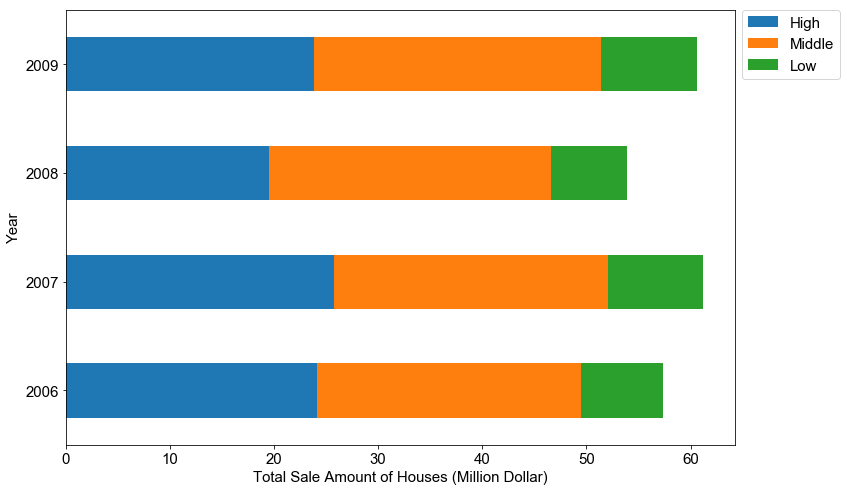

In [16]:
ClassOrder = ["High","Middle","Low"]
ax = PriceClassYear1[ClassOrder].iloc[:4,].plot.barh(stacked=True,figsize=(12,8))
ax.set_xticklabels([0,10,20,30,40,50,60])
ax.set_xlabel("Total Sale Amount of Houses (Million Dollar)")
ax.set_ylabel("Year")
#ax.set_xlim([0,7.5e7])
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig("D:\HSBC assignment\Figure\HousePriceAmountvsYear"+".png",bbox_inches='tight')

# Composition of Housing Market 

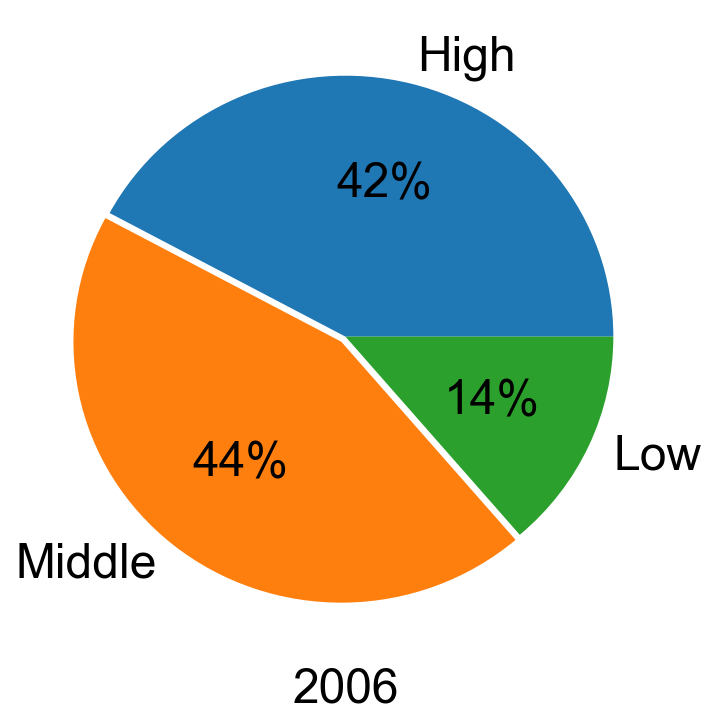

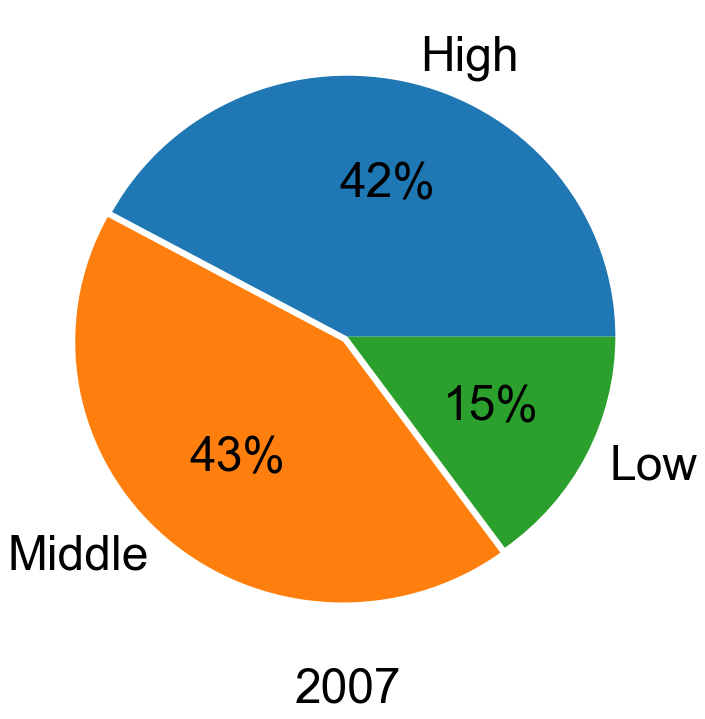

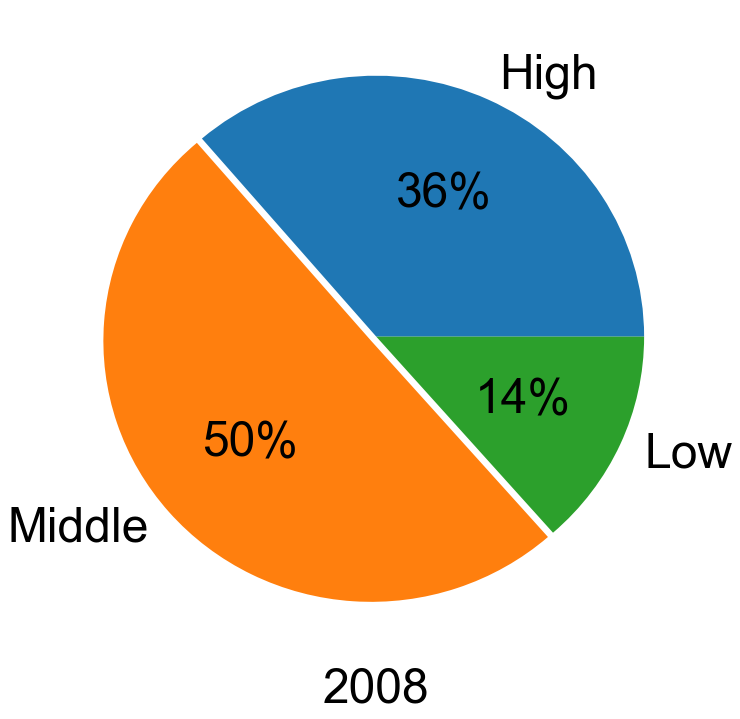

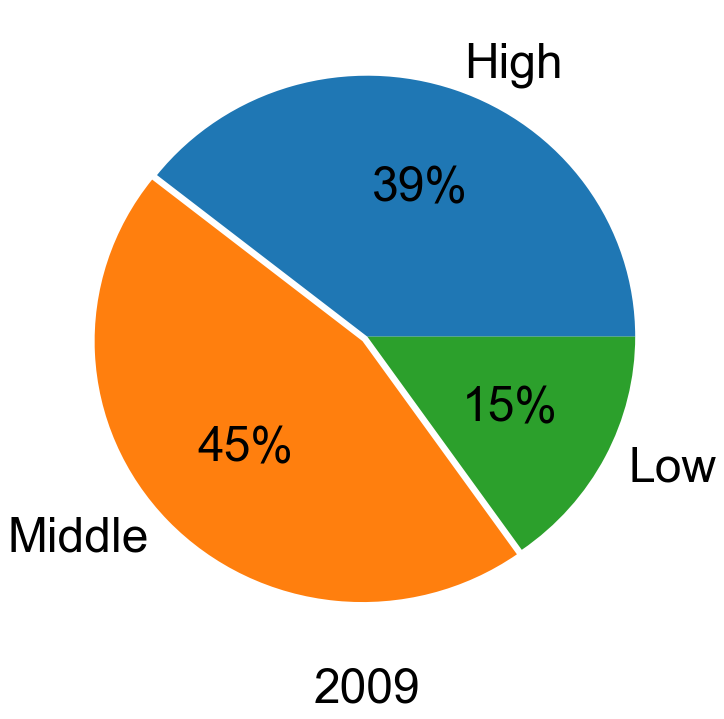

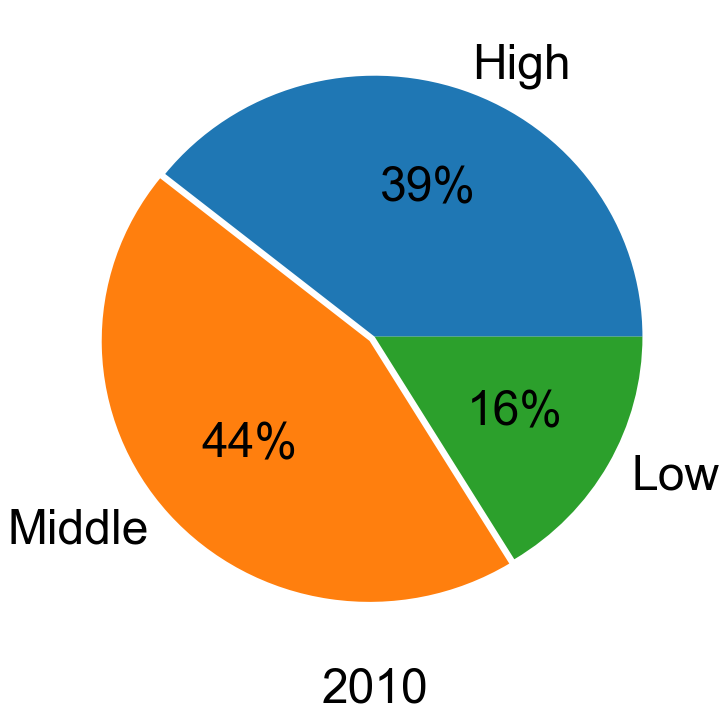

In [17]:
font = {'family' : 'arial',
        'size'   : 48}

matplotlib.rc('font', **font)
PriceClassYear2 = train.groupby(["PriceClass",'YrSold'])[['SalePrice']].sum().unstack(level=1)
PriceClassYear2.columns = [2006,2007,2008,2009,2010]
PriceClassYear2.index = ["High","Low","Middle"]
ClassOrder = ["High","Middle","Low"]
PriceClassYear2 = PriceClassYear2.reindex(ClassOrder)
explode = (0, 0.025, 0)
for i in PriceClassYear2.columns:
    ax=PriceClassYear2.plot.pie(y=i,autopct='%1.0f%%',figsize=(12,12),textprops={'fontsize': 48},explode=explode,legend=False)
    #ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    #ax.set_title("Total Amount of House Sold ("+str(i)+")")
    ax.set_ylabel("")
    ax.set_xlabel(str(i))
    fig = ax.get_figure()
    fig.savefig("D:\HSBC assignment\Figure\piechartnolegend"+str(i)+".png",bbox_inches='tight')

# Total number of sold houses per year

In [18]:
PriceClassNum = train.groupby(['YrSold',"PriceClass"])[['PriceClass']].count().unstack(level=1)
PriceClassNum.index = [2006,2007,2008,2009,2010]
PriceClassNum.columns = ["High","Low","Middle"]
ClassOrder = ["High","Middle","Low"]
PriceClassNum = PriceClassNum[ClassOrder]
PriceClassNum

,High,Middle,Low
2006,85,155,74
2007,87,159,83
2008,70,164,70
2009,82,166,90
2010,43,84,48


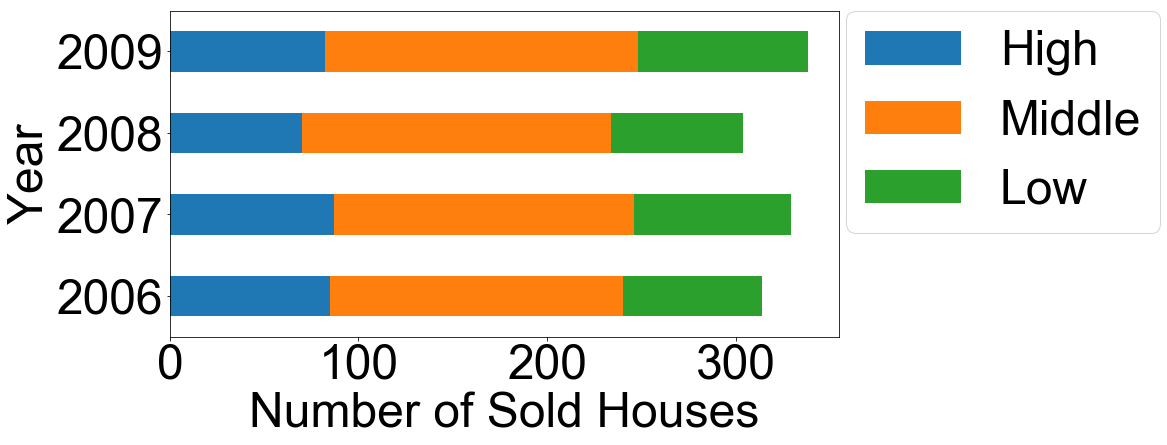

In [19]:
ax = PriceClassNum.iloc[:4,].plot.barh(stacked=True,figsize=(12,6))
ax.set_xlabel("Number of Sold Houses")
ax.set_ylabel("Year")
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig("D:\HSBC assignment\Figure\HouseNumSoldvsYear"+".png",bbox_inches='tight')

# Time Series of House Price 

In [20]:
train["SoldDate"] = train["YrSold"].apply(lambda x: str(x)) + "-" + train["MoSold"].apply(lambda x: str(x))
train["SoldDate"] = pd.to_datetime(train["SoldDate"])

In [21]:
SalePriceDate = train.groupby(['SoldDate','PriceClass'])[['SalePrice']].sum()
SalePriceDate = SalePriceDate.unstack(level=1)
SalePriceDate.columns = ['High', 'Low', 'Middle']
SalePriceDate = SalePriceDate[ClassOrder]
SalePriceDate['Total Sale'] = SalePriceDate['High'] + SalePriceDate['Middle'] + SalePriceDate['Low']

In [22]:
# Smoothing the time series

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [24]:
SalePriceDate = SalePriceDate.fillna(method='ffill')

In [25]:
freq=2
result1=seasonal_decompose(SalePriceDate["High"],freq=freq)
result2=seasonal_decompose(SalePriceDate["Middle"],freq=freq)
result3=seasonal_decompose(SalePriceDate["Low"],freq=freq)

In [26]:
result = pd.concat([result1.trend,result2.trend,result3.trend],axis=1)

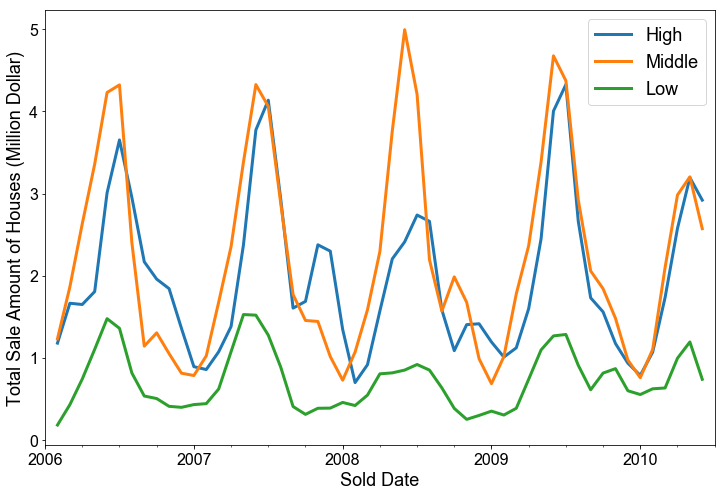

In [27]:
font = {'family' : 'arial',
        'size'   : 18}

matplotlib.rc('font', **font)
ax = result.plot(figsize=(12,8),linewidth=3,fontsize=16)
ax.set_yticklabels(['0','0','1','2','3','4','5'])
ax.set_xlabel("Sold Date")
ax.set_ylabel("Total Sale Amount of Houses (Million Dollar)")
#ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig("D:\HSBC assignment\Figure\HousePriceAmount_TimeSeries"+".png",bbox_inches='tight')

# Importance Features

In [28]:
corr = train[train['PriceClass']=='High'].corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr_class = corr[["SalePrice"]]
corr_class.columns = ['High']

In [29]:
for i in ['Middle','Low']:
    corr = train[train['PriceClass']==i].corr()
    corr.sort_values(["SalePrice"], ascending = False, inplace = True)
    corr_col = corr[["SalePrice"]]
    corr_col.columns = [i]
    corr_class = pd.concat([corr_class,corr_col],axis=1)

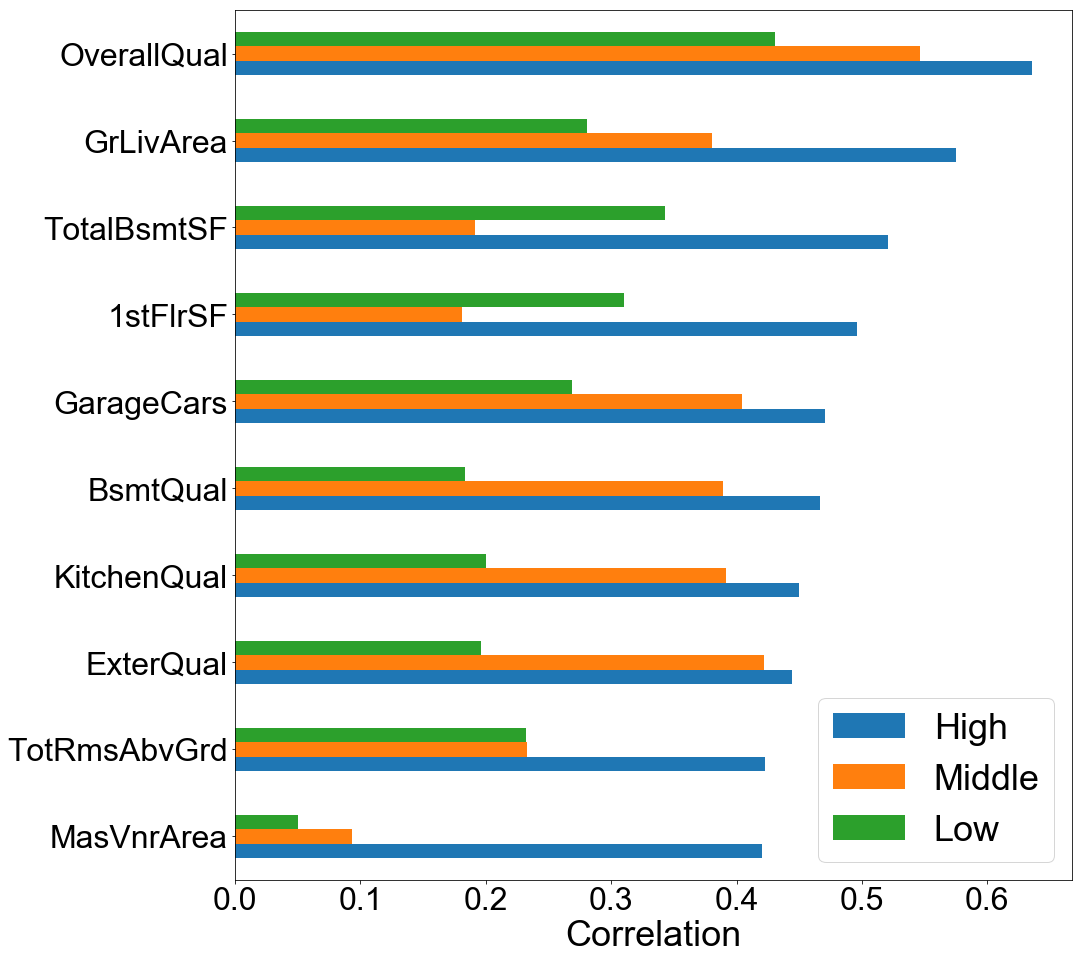

In [30]:
font = {'family' : 'arial',
        'size'   : 36}

matplotlib.rc('font', **font)
ax = corr_class.dropna().sort_values(by='High').iloc[-11:-1,].plot.barh(figsize=(15,16),fontsize=32)
ax.set_xlabel('Correlation',fontsize=36)
fig = ax.get_figure()
fig.savefig("D:\HSBC assignment\Figure\PriceClass_features"+".png",bbox_inches='tight')

In [31]:
from wordcloud import WordCloud

C:\Users\HoT\Anaconda3_2\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


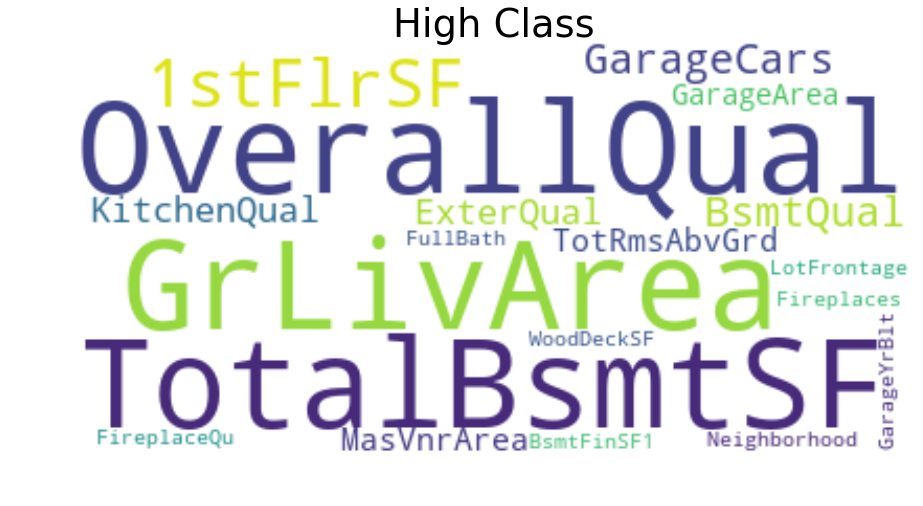

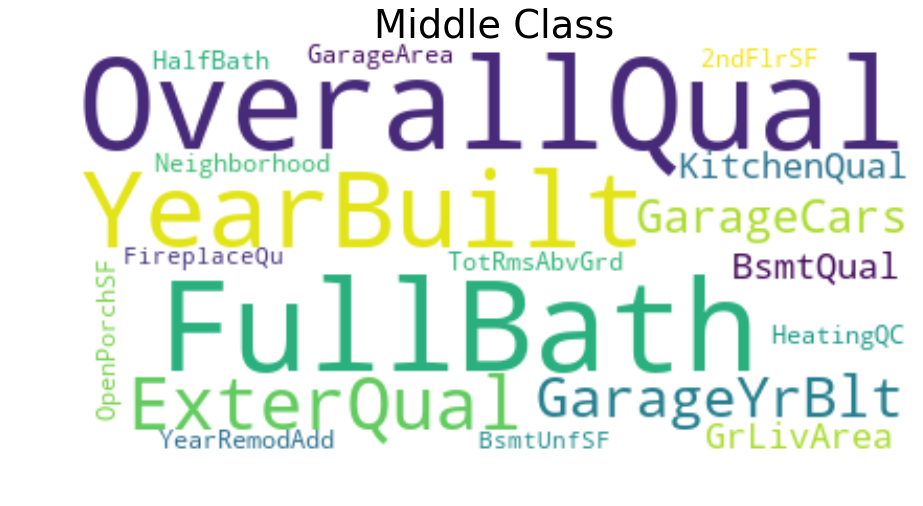

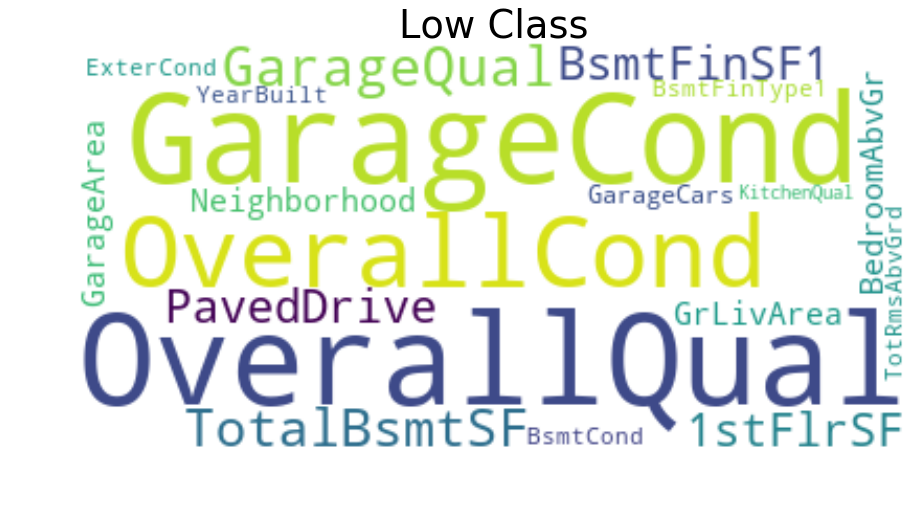

In [32]:
font = {'family' : 'normal',
        'size'   : 32}

matplotlib.rc('font', **font)
for i in ['High','Middle','Low']:
    word = corr_class[i].sort_values(ascending=False)[1:20].index.values
    text=" ".join(word)
    wordcloud=WordCloud(background_color="white",collocations=False).generate(text)
    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(i+" Class")
    plt.savefig("D:\HSBC assignment\Figure\PriceClass_wordcloud_"+i+".png")